In [1]:
#%pip install axelrod
#!conda list freetype

In [2]:
import axelrod as axl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.stats import spearmanr
from math import isnan

### Setup parameters

In [3]:
# Strategies from original axelrod tournament
players = [axl.TitForTat(), axl.FirstByTidemanAndChieruzzi(), axl.FirstByNydegger(), axl.FirstByGrofman(), axl.FirstByShubik(),
           axl.FirstBySteinAndRapoport(), axl.Grudger(), axl.FirstByDavis(), axl.FirstByGraaskamp(), axl.FirstByDowning(),
           axl.FirstByFeld(), axl.FirstByJoss(), axl.FirstByTullock(), axl.FirstByAnonymous(), axl.Random()]    


num_players = len(players)
num_reps = 5
num_turns = 200

### Running the tournament

In [4]:
tournament = axl.Tournament(players=players, repetitions=num_reps, turns=num_turns)
results = tournament.play(build_results = True, filename="results.csv")

Analysing: 100%|██████████| 25/25 [00:00<00:00, 39.76it/s]


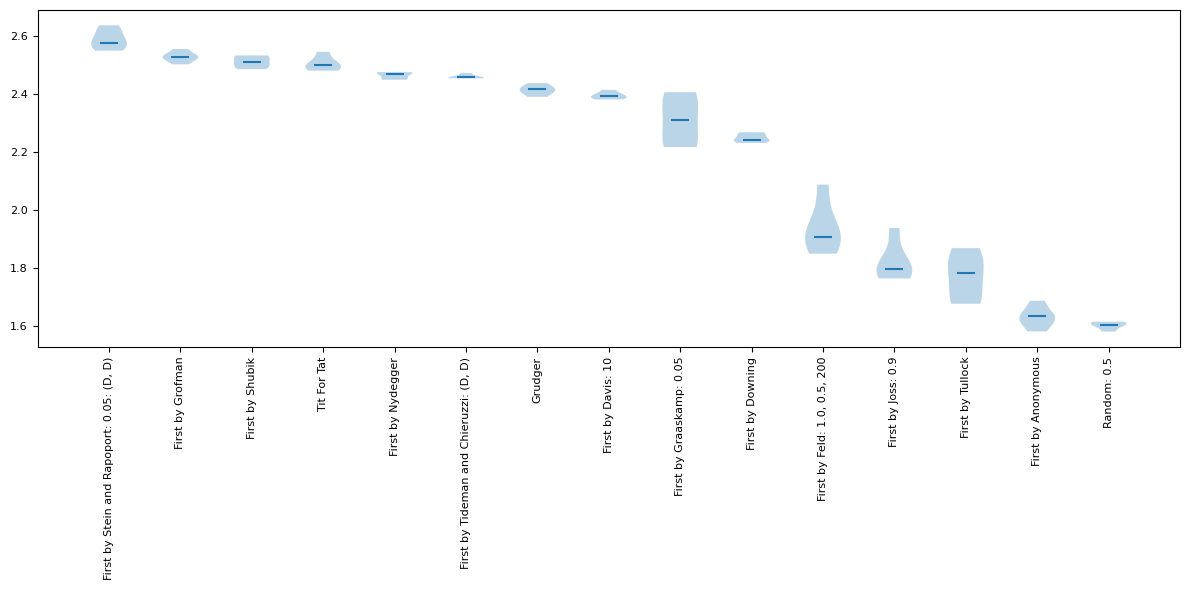

In [5]:
%matplotlib inline
plot = axl.Plot(results)
p = plot.boxplot()

In [6]:
results.write_summary("summary.csv")

In [7]:
results.scores

[[7022, 6997, 6961, 7125, 6943],
 [6871, 6887, 6920, 6878, 6869],
 [6928, 6914, 6856, 6864, 6929],
 [7152, 7004, 7079, 7079, 7067],
 [7027, 7088, 6958, 7090, 6984],
 [7136, 7205, 7380, 7308, 7202],
 [6733, 6691, 6769, 6769, 6823],
 [6677, 6666, 6702, 6758, 6710],
 [6464, 6736, 6210, 6678, 6208],
 [6273, 6350, 6333, 6247, 6277],
 [5338, 5330, 5438, 5846, 5181],
 [4942, 5428, 5088, 5037, 5007],
 [5106, 4994, 4698, 5234, 4742],
 [4578, 4534, 4727, 4432, 4581],
 [4519, 4481, 4430, 4525, 4498]]

In [8]:
results.normalised_scores

[[2.507857142857143,
  2.4989285714285714,
  2.4860714285714285,
  2.544642857142857,
  2.479642857142857],
 [2.453928571428572,
  2.4596428571428572,
  2.4714285714285715,
  2.4564285714285714,
  2.4532142857142856],
 [2.474285714285714,
  2.4692857142857143,
  2.448571428571429,
  2.4514285714285715,
  2.4746428571428574],
 [2.5542857142857143,
  2.501428571428572,
  2.5282142857142857,
  2.5282142857142857,
  2.5239285714285713],
 [2.509642857142857,
  2.531428571428571,
  2.485,
  2.5321428571428575,
  2.494285714285714],
 [2.5485714285714285,
  2.5732142857142857,
  2.6357142857142857,
  2.61,
  2.572142857142857],
 [2.404642857142857, 2.389642857142857, 2.4175, 2.4175, 2.4367857142857146],
 [2.384642857142857,
  2.380714285714286,
  2.3935714285714282,
  2.4135714285714287,
  2.3964285714285714],
 [2.3085714285714287,
  2.4057142857142857,
  2.217857142857143,
  2.3850000000000002,
  2.217142857142857],
 [2.240357142857143,
  2.267857142857143,
  2.2617857142857143,
  2.231071428

In [9]:
results.payoffs[2] # this is a way to implement schulze method by match

[[3.0, 3.0, 3.0, 3.0, 3.0],
 [2.97, 2.97, 2.97, 2.97, 2.97],
 [3.0, 3.0, 3.0, 3.0, 3.0],
 [3.0, 3.0, 3.0, 3.0, 3.0],
 [3.0, 3.0, 3.0, 3.0, 3.0],
 [2.97, 2.97, 2.97, 2.97, 2.97],
 [3.0, 3.0, 3.0, 3.0, 3.0],
 [3.0, 3.0, 3.0, 3.0, 3.0],
 [2.76, 2.76, 2.76, 2.76, 2.76],
 [0.075, 0.075, 0.075, 0.075, 0.075],
 [2.25, 2.28, 2.25, 2.34, 2.19],
 [2.715, 2.7, 2.635, 2.595, 2.76],
 [2.715, 2.79, 2.715, 2.655, 2.73],
 [1.5, 1.575, 1.48, 1.405, 1.55],
 [1.685, 1.45, 1.425, 1.55, 1.64]]

### Schulze method

#### Build pairwise wins matrix

In [10]:
pairwise_wins = np.zeros((num_players, num_players), dtype=float)

for strat_1 in range(num_players):
    for strat_2 in range(num_players):
        if strat_1 != strat_2:
            wins_1 = 0
            wins_2 = 0
            for rep in range(num_reps):
                score_1 = results.payoffs[strat_1][strat_2][rep]
                score_2 = results.payoffs[strat_2][strat_1][rep]
                if score_1 > score_2:
                    wins_1 += round((score_1-score_2) * num_turns)
            # Save score difference from strat_1 over strat_2 (if positive)
            pairwise_wins[strat_1][strat_2] = wins_1
        else:
            pairwise_wins[strat_1][strat_2] = np.nan    

print("Pairwise wins matrix:\n", pairwise_wins)

Pairwise wins matrix:
 [[  nan    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.]
 [  25.   nan   50.   30.   25.    0.   25.   25.  250.  150.    0.    0.
    30. 1975. 1945.]
 [   0.    0.   nan    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.]
 [   0.    0.    0.   nan    0.    0.    0.    0.  375.    0.    0.    0.
     0.    0.    0.]
 [   0.    0.    0.    0.   nan    0.    0.    0. 1460.    0.    0.    0.
     0. 1525. 1655.]
 [  25.    0.   50.   30.   25.   nan   25.   25.   25. 1425.    0.    0.
     0. 2330. 2275.]
 [   0.    0.    0.    0.    0.    0.   nan    0.  670.   50.    0.    0.
    85. 2545. 2445.]
 [   0.    0.    0.    0.    0.    0.    0.   nan  655.    0.    0.    0.
    95. 2265. 2215.]
 [   0.    0.  400.    0.    0.    0.    0.    0.   nan  395.    0.    0.
     0. 1680. 1715.]
 [   0.    0. 4825. 2800.   75.    0.    0.  125.    0.   nan    0.    0.
   150. 2305. 2470.]
 [  25.    0. 1230.  740.  

#### Apply Schulze method

In [11]:
def schulze_method(pairwise_matrix):
    n = len(pairwise_matrix)

    # Compute strongest paths (Floyd–Warshall style)
    for i in range(n):
        for j in range(n):
            if i != j:
                for k in range(n):
                    if i != k and j != k:
                        pairwise_matrix[j][k] = max(pairwise_matrix[j][k], min(pairwise_matrix[j][i], pairwise_matrix[i][k]))

    # Ranking: sort by scores difference in path strength
    ranking = sorted(range(n), key=lambda x: sum(pairwise_matrix[x][y] > pairwise_matrix[y][x] for y in range(n)), reverse=True)
    return ranking

schulze_ranking = schulze_method(pairwise_wins)
print("\nSchulze ranking:")
for pos, idx in enumerate(schulze_ranking, 1):
    print(f"{pos}. {players[idx]}")


Schulze ranking:
1. First by Joss: 0.9
2. First by Tideman and Chieruzzi: (D, D)
3. First by Feld: 1.0, 0.5, 200
4. First by Stein and Rapoport: 0.05: (D, D)
5. Grudger
6. First by Davis: 10
7. First by Tullock
8. First by Shubik
9. First by Graaskamp: 0.05
10. First by Downing
11. First by Anonymous
12. Random: 0.5
13. First by Grofman
14. Tit For Tat
15. First by Nydegger


In [12]:
print(pairwise_wins)

[[  nan    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.]
 [  25.   nan 1975.  795.  150.   25.   25.  125.  375.  375.    5.    5.
   150. 1975. 1945.]
 [   0.    0.   nan    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.]
 [  25.    5.  375.   nan  150.   25.   25.  125.  375.  375.    5.    5.
   150.  375.  375.]
 [  25.    5. 1655.  795.   nan   25.   25.  125. 1460.  395.    5.    5.
   150. 1525. 1655.]
 [  25.    5. 2330. 1425.  150.   nan   25.  125.  375. 1425.    5.    5.
   150. 2330. 2275.]
 [  25.    5. 2455.  795.  150.   25.   nan  125.  670.  395.    5.    5.
   150. 2545. 2445.]
 [  25.    5. 2265.  795.  150.   25.   25.   nan  655.  395.    5.    5.
   150. 2265. 2215.]
 [  25.    5. 1715.  795.  150.   25.   25.  125.   nan  395.    5.    5.
   150. 1680. 1715.]
 [  25.    5. 4825. 2800.  150.   25.   25.  125.  375.   nan    5.    5.
   150. 2305. 2470.]
 [  25.    5. 1270. 1270.  150.   25.   25.  125. 

In [13]:
print(schulze_ranking)

[11, 1, 10, 5, 6, 7, 12, 4, 8, 9, 13, 14, 3, 0, 2]


#### Schulze graph

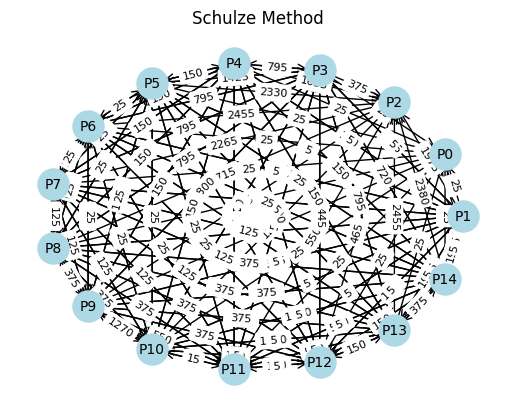


 Legend:
P0 - Tit For Tat
P1 - First by Tideman and Chieruzzi: (D, D)
P2 - First by Nydegger
P3 - First by Grofman
P4 - First by Shubik
P5 - First by Stein and Rapoport: 0.05: (D, D)
P6 - Grudger
P7 - First by Davis: 10
P8 - First by Graaskamp: 0.05
P9 - First by Downing
P10 - First by Feld: 1.0, 0.5, 200
P11 - First by Joss: 0.9
P12 - First by Tullock
P13 - First by Anonymous
P14 - Random: 0.5


In [14]:
def plot_margin_graph(pairwise_wins, labels=None):
    """
    Plot weighted directed graph for pairwise margins.
    Positive weight means row player beats column player by that margin.
    """
    n = pairwise_wins.shape[0]
    G = nx.DiGraph()

    if labels is None:
        labels = [f"S{i}" for i in range(n)]

    # Add edges with weight
    for i in range(n):
        for j in range(n):
            if i != j and pairwise_wins[i][j] > 0:
                G.add_edge(labels[i], labels[j], weight=int(pairwise_wins[i][j]))

    # Layout
    pos = nx.circular_layout(G)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Draw edges with thickness proportional to margin
    edges = G.edges(data=True)
    widths = [max(1, w['weight'] / max(pairwise_wins.flatten()) * 10) for (_, _, w) in edges]
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=widths, arrowstyle='->', arrowsize=15)

    # Add labels showing margins
    edge_labels = {(u, v): f"{d['weight']}" for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Schulze Method")
    plt.axis("off")
    plt.show()

# Example usage:
a = plot_margin_graph(pairwise_wins, labels=[f"P{i}" for i in range(pairwise_wins.shape[0])])
a
print("\n Legend:")
for idx in range (0,num_players):
    print(f"P{idx} - {players[idx]}")

### Ranking comparasion

In [15]:
print("\nAxelrod classic ranking:")
for idx in range (0,num_players):
    print(f"{idx+1}. {results.ranked_names[idx]}")

print("\nSchulze ranking:")
for pos, idx in enumerate(schulze_ranking, 1):
    print(f"{pos}. {players[idx]}")


Axelrod classic ranking:
1. First by Stein and Rapoport: 0.05: (D, D)
2. First by Grofman
3. First by Shubik
4. Tit For Tat
5. First by Nydegger
6. First by Tideman and Chieruzzi: (D, D)
7. Grudger
8. First by Davis: 10
9. First by Graaskamp: 0.05
10. First by Downing
11. First by Feld: 1.0, 0.5, 200
12. First by Joss: 0.9
13. First by Tullock
14. First by Anonymous
15. Random: 0.5

Schulze ranking:
1. First by Joss: 0.9
2. First by Tideman and Chieruzzi: (D, D)
3. First by Feld: 1.0, 0.5, 200
4. First by Stein and Rapoport: 0.05: (D, D)
5. Grudger
6. First by Davis: 10
7. First by Tullock
8. First by Shubik
9. First by Graaskamp: 0.05
10. First by Downing
11. First by Anonymous
12. Random: 0.5
13. First by Grofman
14. Tit For Tat
15. First by Nydegger


In [16]:
classic_ranking = []  # list to match structure of schulze ranking
summary_df = pd.read_csv("summary.csv")
for i in range(num_players):
    classic_ranking.append(int(summary_df['Original_index'][i]))

In [18]:
schulze_ranking

[11, 1, 10, 5, 6, 7, 12, 4, 8, 9, 13, 14, 3, 0, 2]

In [17]:
classic_ranking

[5, 3, 4, 0, 2, 1, 6, 7, 8, 9, 10, 11, 12, 13, 14]

### Win-based tournament

In [19]:
wins = np.zeros((num_players, num_players), dtype=float)

for strat_1 in range(num_players):
    for strat_2 in range(num_players):
        if strat_1 != strat_2:
            wins_1 = 0
            wins_2 = 0
            for rep in range(num_reps):
                score_1 = results.payoffs[strat_1][strat_2][rep]
                score_2 = results.payoffs[strat_2][strat_1][rep]
                if score_1 > score_2:
                    wins_1 += 1 
            # Save win from strat_1 over strat_2 (if score is positive)
            wins[strat_1][strat_2] = wins_1
        else:
            wins[strat_1][strat_2] = np.nan    

print("Pairwise wins matrix:\n", wins)

Pairwise wins matrix:
 [[nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5. nan  5.  5.  5.  0.  5.  5.  5.  5.  0.  0.  3.  5.  5.]
 [ 0.  0. nan  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. nan  0.  0.  0.  0.  5.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. nan  0.  0.  0.  5.  0.  0.  0.  0.  5.  5.]
 [ 5.  0.  5.  5.  5. nan  5.  5.  5.  5.  0.  0.  0.  5.  5.]
 [ 0.  0.  0.  0.  0.  0. nan  0.  5.  5.  0.  0.  5.  5.  5.]
 [ 0.  0.  0.  0.  0.  0.  0. nan  5.  0.  0.  0.  5.  5.  5.]
 [ 0.  0.  5.  0.  0.  0.  0.  0. nan  5.  0.  0.  0.  5.  5.]
 [ 0.  0.  5.  5.  5.  0.  0.  5.  0. nan  0.  0.  5.  5.  5.]
 [ 5.  0.  5.  5.  5.  4.  0.  0.  4.  5. nan  1.  1.  5.  5.]
 [ 5.  1.  5.  5.  4.  4.  1.  2.  4.  5.  3. nan  4.  5.  5.]
 [ 5.  0.  5.  5.  5.  5.  0.  0.  4.  0.  1.  0. nan  5.  5.]
 [ 1.  0.  5.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0. nan  4.]
 [ 2.  0.  5.  5.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. nan]]


In [20]:
def win_based_method(wins):
    n = len(wins)
    total_wins = []         # total wins of each strategy
    for i in range(n):
        suma = 0
        for j in range(n):
            if i != j:
                suma += wins[i][j]
        total_wins.append(int(suma))
    rankings = [i for i in range(num_players)]
    data = list(zip(rankings, total_wins))

    # Sort descending by total wins
    data.sort(key=lambda x: x[1], reverse=True)

    return [rank for rank, _ in data]

win_based_ranking = win_based_method(wins)
win_based_ranking

[1, 11, 5, 10, 12, 9, 6, 7, 8, 4, 13, 14, 3, 0, 2]

### Analysis of results

### Some general visualisation

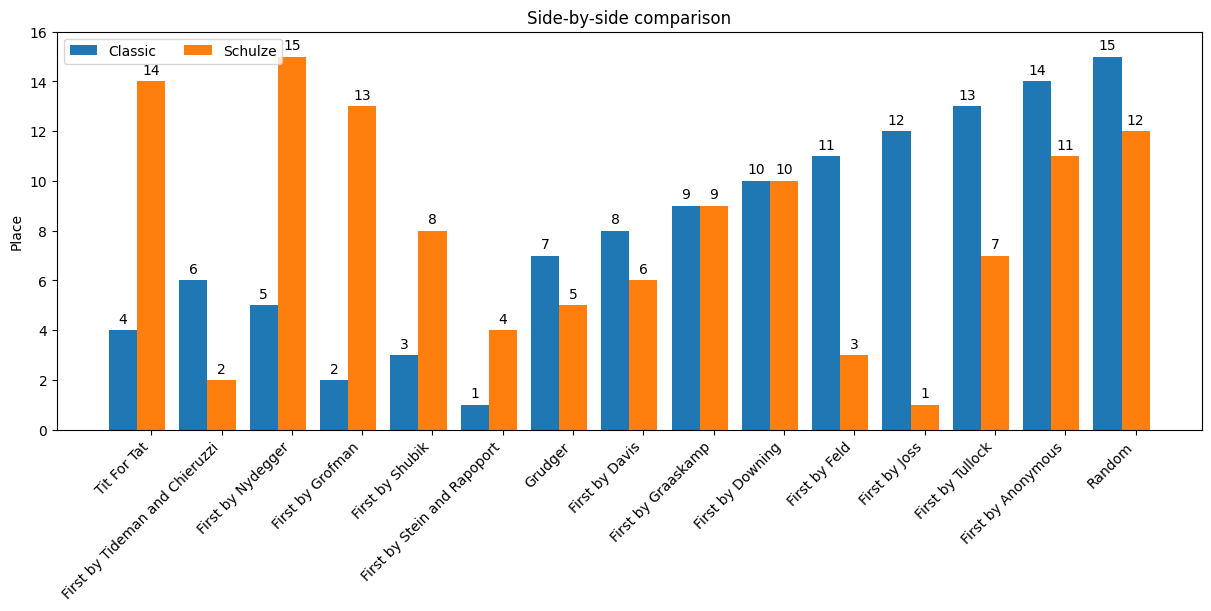

In [21]:
players_names = [p.name for p in players]
ranks = {
    'Classic': [classic_ranking.index(i)+1 for i in range(num_players)],
    'Schulze': [schulze_ranking.index(i)+1 for i in range(num_players)]
}

x = np.arange(len(players))
width = 0.4  
multiplier = 0
fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')

for type, place in ranks.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, place, width, label=type)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Place')
ax.set_title('Side-by-side comparison')
ax.set_xticks(x + width, players_names, rotation=45, ha="right")
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, num_players + 1)

plt.show()

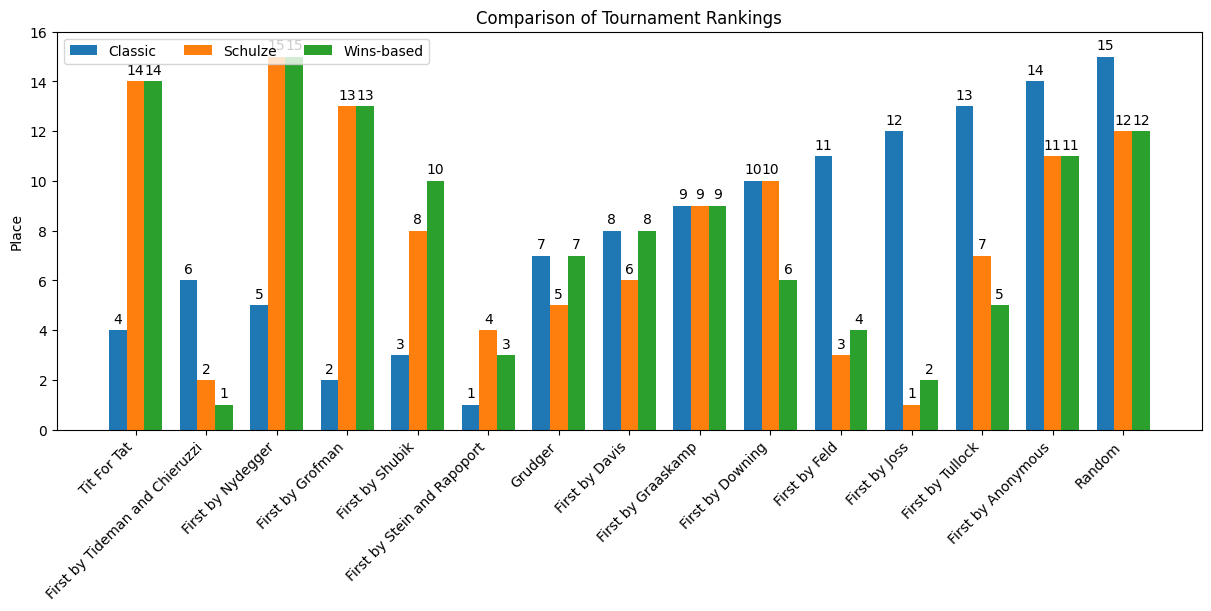

In [22]:
players_names = [p.name for p in players]

# Create dictionary of rankings for all 3 methods
ranks = {
    'Classic':  [classic_ranking.index(i) + 1 for i in range(num_players)],
    'Schulze':  [schulze_ranking.index(i) + 1 for i in range(num_players)],
    'Wins-based': [win_based_ranking.index(i) + 1 for i in range(num_players)]
}

# Visualization
x = np.arange(len(players))
width = 0.25  
multiplier = 0

fig, ax = plt.subplots(figsize=(12, 6), layout='constrained')

for type, place in ranks.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, place, width, label=type)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Place')
ax.set_title('Comparison of Tournament Rankings')
ax.set_xticks(x + width, players_names, rotation=45, ha="right")
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, num_players + 1)

plt.show()

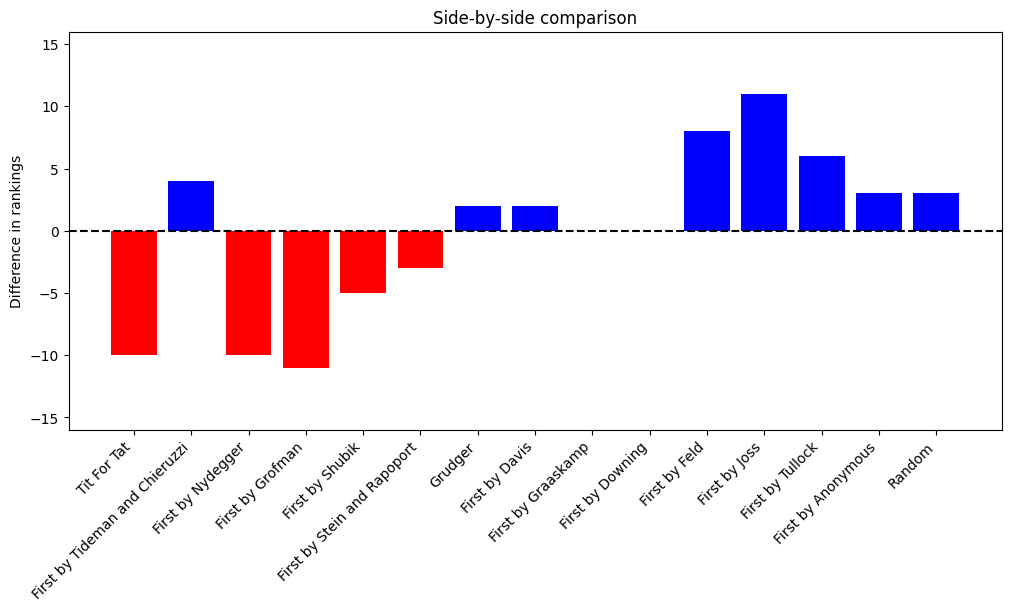

In [23]:
diffs = [classic_ranking.index(s) - schulze_ranking.index(s) for s in range(num_players)]

x = np.arange(len(players))
width = 1  
multiplier = 0
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')

ax.bar(players_names,diffs,color=['b' if d >=0 else 'r' for d in diffs ])
ax.axhline(y=0, color='black', linestyle='--')
ax.set_ylabel('Difference in rankings')
ax.set_title('Side-by-side comparison')
ax.set_xticks(x, players_names, rotation=45, ha="right")
ax.set_ylim(-num_players-1, num_players + 1)

plt.show()

#### Creating all-in-one dataframe

In [24]:
all_tournaments_df = pd.read_csv("summary.csv")    # All tournaments rankings and main metrics
schulze_rank_map = {idx: rank  for rank, idx in enumerate(schulze_ranking)}
win_rank_map = {idx: rank  for rank, idx in enumerate(win_based_ranking)}

# Add new columns to the dataframe by mapping
all_tournaments_df["Schulze_Rank"] = all_tournaments_df["Original_index"].map(schulze_rank_map)
all_tournaments_df["Win_Based_Rank"] = all_tournaments_df["Original_index"].map(win_rank_map)

new_order = ["Rank","Schulze_Rank", "Win_Based_Rank"] + [col for col in all_tournaments_df.columns if col not in ["Rank","Schulze_Rank", "Win_Based_Rank"]]
all_tournaments_df = all_tournaments_df[new_order]
# Save to file
all_tournaments_df.to_csv("all_tournaments_rankings.csv", index=False)


In [31]:
def compute_rank_correlations(df):
    """
    Returns Spearman correlations pairwise.
    """
    a = df['Rank']
    b = df['Win_Based_Rank']
    c = df['Schulze_Rank']
    out = {}
    out['score_vs_wins'] = spearmanr(a, b).correlation
    out['score_vs_schulze'] = spearmanr(a, c).correlation
    out['wins_vs_schulze'] = spearmanr(b, c).correlation
    return out

compute_rank_correlations(all_tournaments_df)

{'score_vs_wins': np.float64(-0.15357142857142855),
 'score_vs_schulze': np.float64(-0.10357142857142855),
 'wins_vs_schulze': np.float64(0.9357142857142854)}

In [26]:
all_tournaments_df.head(5)

,Rank,Schulze_Rank,Win_Based_Rank,Name,Median_score,Cooperation_rating,Wins,Initial_C_rate,Original_index,CC_rate,CD_rate,DC_rate,DD_rate,CC_to_C_rate,CD_to_C_rate,DC_to_C_rate,DD_to_C_rate
0,0,3,2,"First by Stein and Rapoport: 0.05: (D, D)",2.573214,0.595929,10.0,1.0,5,0.552143,0.043786,0.131857,0.272214,0.984531,0.242903,0.586560,0.000000
1,1,12,12,First by Grofman,2.528214,0.847071,1.0,1.0,3,0.701429,0.145643,0.067500,0.085429,1.000000,0.258145,0.282206,1.000000
2,2,7,9,First by Shubik,2.509643,0.616786,3.0,1.0,4,0.572429,0.044357,0.102500,0.280714,1.000000,0.000000,0.151730,0.109419
3,3,13,13,Tit For Tat,2.498929,0.719714,0.0,1.0,0,0.647714,0.072000,0.070000,0.210286,1.000000,0.000000,1.000000,0.000000
4,4,14,14,First by Nydegger,2.469286,0.995643,0.0,1.0,2,0.816429,0.179214,0.002500,0.001857,0.999701,0.987399,0.727273,0.709821


In [28]:
all_tournaments_df[all_tournaments_df["Schulze_Rank"]<3]

,Rank,Schulze_Rank,Win_Based_Rank,Name,Median_score,Cooperation_rating,Wins,Initial_C_rate,Original_index,CC_rate,CD_rate,DC_rate,DD_rate,CC_to_C_rate,CD_to_C_rate,DC_to_C_rate,DD_to_C_rate
5,5,1,0,"First by Tideman and Chieruzzi: (D, D)",2.456429,0.591714,11.0,1.0,1,0.574786,0.016929,0.081571,0.326714,0.994038,0.02381,0.366549,0.0
10,10,2,3,"First by Feld: 1.0, 0.5, 200",1.906429,0.299643,9.0,1.0,10,0.239143,0.060500,0.130071,0.570286,0.888656,0.00000,0.841300,0.0
11,11,0,1,First by Joss: 0.9,1.798929,0.316714,11.0,1.0,11,0.255429,0.061286,0.093000,0.590286,0.902878,0.00000,0.885596,0.0


In [38]:
def compute_any_correlations(df,col_name):
    a = df['Rank']
    b = df['Win_Based_Rank']
    c = df['Schulze_Rank']
    d = df[col_name]
    out = {}
    out['Classic'] = spearmanr(a, d).correlation
    out['Win-Based'] = spearmanr(b, d).correlation
    out['Schulze'] = spearmanr(c, d).correlation
    return out

compute_any_correlations(all_tournaments_df,"Initial_C_rate")

{'Classic': np.float64(-0.5488695843700093),
 'Win-Based': np.float64(-0.16083155262935156),
 'Schulze': np.float64(-0.3344275141975405)}

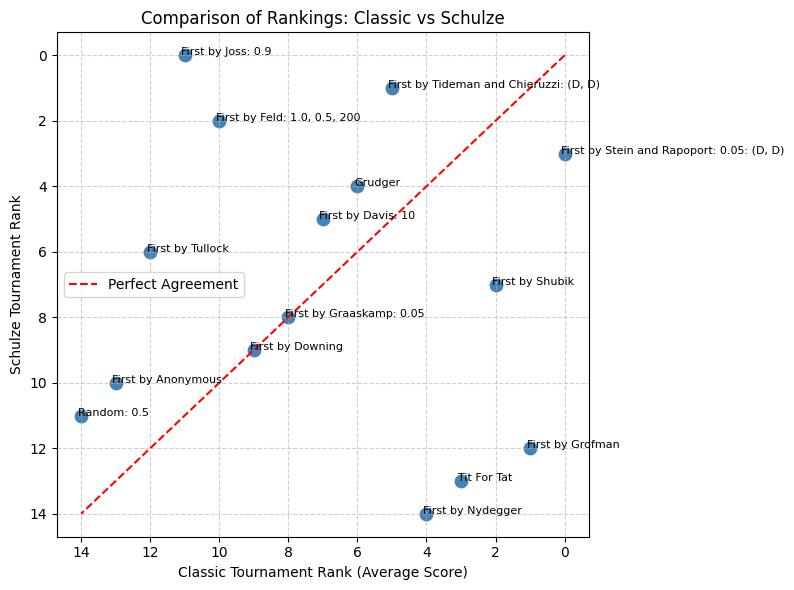

In [41]:
# Extract ranks
classic_ranks = all_tournaments_df["Rank"]
schulze_ranks = all_tournaments_df["Schulze_Rank"]
names = all_tournaments_df["Strategy"] if "Strategy" in all_tournaments_df.columns else all_tournaments_df["Name"]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(classic_ranks, schulze_ranks, color='steelblue', s=80)

# Label each point with strategy name
for i, name in enumerate(names):
    plt.text(classic_ranks[i] + 0.1, schulze_ranks[i], name, fontsize=8)

# Add diagonal (line of perfect agreement)
plt.plot([min(classic_ranks), max(classic_ranks)], 
         [min(classic_ranks), max(classic_ranks)], 
         'r--', label='Perfect Agreement')

# Axis labels and title
plt.xlabel("Classic Tournament Rank (Average Score)")
plt.ylabel("Schulze Tournament Rank")
plt.title("Comparison of Rankings: Classic vs Schulze")
plt.legend()
plt.gca().invert_xaxis()  # Optional: best rank = 1, so smaller is better
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()